# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv('alena.csv')
df 


,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,1,337,4.770685,1.386294,4.5,9.65,1,0.92
1,2,324,4.672829,1.386294,4.5,8.87,1,0.76
2,3,316,4.644391,1.098612,3.5,8.00,1,0.72
3,4,322,4.700480,1.098612,2.5,8.67,1,0.80
4,5,314,4.634729,0.693147,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,396,324,4.700480,1.098612,3.5,9.04,1,0.82
396,397,325,4.672829,1.098612,3.5,9.11,1,0.84
397,398,330,4.753590,1.386294,4.5,9.45,1,0.91
398,399,312,4.634729,1.098612,4.0,8.78,0,0.67


# Data preparation

In [10]:
df['level CGPA']=np.where (df['CGPA']<=8.0,0,1)

In [11]:
df


,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit,level CGPA
0,1,337,4.770685,1.386294,4.5,9.65,1,0.92,1
1,2,324,4.672829,1.386294,4.5,8.87,1,0.76,1
2,3,316,4.644391,1.098612,3.5,8.00,1,0.72,0
3,4,322,4.700480,1.098612,2.5,8.67,1,0.80,1
4,5,314,4.634729,0.693147,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...
395,396,324,4.700480,1.098612,3.5,9.04,1,0.82,1
396,397,325,4.672829,1.098612,3.5,9.11,1,0.84,1
397,398,330,4.753590,1.386294,4.5,9.45,1,0.91,1
398,399,312,4.634729,1.098612,4.0,8.78,0,0.67,1


In [14]:
p=['GRE Score','TOEFL Score','University Rating','Research']

In [15]:
X = df[p]
y = df['level CGPA']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# Feature Selection

In [17]:
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.592564
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.305  
Dependent Variable: level CGPA       AIC:              387.2408
Date:               2021-12-06 20:51 BIC:              402.3140
No. Observations:   320              Log-Likelihood:   -189.62 
Df Model:           3                LL-Null:          -145.25 
Df Residuals:       316              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1        0.2763     0.2503    1.1040   0.2696   -0.2143   0.7669
x2        0.3428     0.2435    1.4081   0.1591   -0.1344   0.8200
x3        0.5359 

Из все переменных только х3 является значимой

In [18]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

3
[ True  True  True False]
[1 1 1 2]


# Fitting Logistic Regression

In [28]:
X_train_select=X_train[:,[True, True, False, False]]
X_test_select=X_test[:,[True, True, False, False]]

In [29]:
X_train_select

array([[-1.8098527 , -1.08519088],
       [-1.11770706, -1.08519088],
       [-0.25252501,  0.25761009],
       [ 0.87221166,  0.89248001],
       [ 1.04524807,  0.41848549],
       [ 0.61265704,  0.57790498],
       [ 0.69917525,  0.73589468],
       [ 0.69917525,  0.73589468],
       [-0.0794886 , -0.40099872],
       [ 0.26658422,  0.41848549],
       [ 0.52613883,  0.41848549],
       [ 0.61265704,  0.41848549],
       [-1.63681629, -1.61635877],
       [-0.25252501,  0.41848549],
       [ 0.52613883, -0.56957162],
       [ 0.43962063,  0.41848549],
       [ 0.43962063,  0.41848549],
       [-0.51207963, -0.56957162],
       [ 0.52613883,  0.73589468],
       [ 0.87221166,  0.89248001],
       [-0.59859783, -0.73977327],
       [-1.98288911, -2.53885926],
       [ 0.52613883,  0.89248001],
       [-1.63681629, -1.08519088],
       [ 0.09354781, -0.23402369],
       [ 1.04524807,  1.04768572],
       [-0.25252501, -0.06861653],
       [-0.59859783, -0.23402369],
       [ 0.26658422,

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [31]:
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(3)

0.862

Можно сделать вывод,что модель в 86% совершает правильный пропуск и в 14% совершает ошибку.

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 5  8]
 [ 3 64]]


Как видно, 69 примеров распознано верно, а 11 нет

# Visualising

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


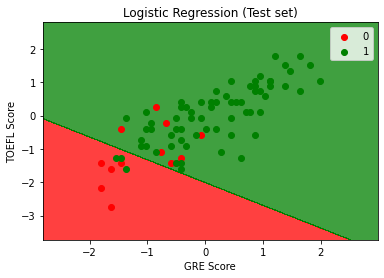

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.legend()
plt.show()

In [1]:
import pickle
obj = {'X_train': X_train_select, 'X_test': X_test_select,'y_train': y_train,'y_test': y_test}
output = open('data1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

NameError: name 'X_train_select' is not defined